# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Muhamad Hamdan Arrosyid
- **Email:** hamdanarosyid@gmail.com
- **ID Dicoding:** hamdanarosyid

## Menentukan Pertanyaan Bisnis

- Kapan musim paling banyak penyewa?
- Jumlah total user yang menyewa pada bulan 1 - 12 pada setiap tahunya

## Import Semua Packages/Library yang Digunakan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Wrangling

### Gathering Data

In [232]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [231]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [52]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [53]:
day_df.duplicated().sum()

0

In [54]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- data date harus di ubah menjadi type date

#### Menilai tabel `hour_df`

In [55]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [56]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [57]:
hour_df.duplicated().sum()

0

In [67]:
hour_df.describe() 

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- data date harus di ubah menjadi type date

### Cleaning Data

#### membersihkan date column

In [233]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [69]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [70]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

#### Explore `day_df`

In [71]:
day_df.describe(include='all')  

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Dapat di lihat rata-rata user menyewa sepeda pada kondisi cuaca 1
- Namun tidak ada yang menyewa sepeda pada kondisi cuaca 4
- User lebih banyak menyewa saat season 2 atau pada saat bulan 6, 7

In [234]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Dapat di lihat rata-rata user menyewa sepeda pada kondisi cuaca 1
- Terdapat user yang menyewa di cuaca 4
- User lebih banyak menyewa saat season 2 atau pada saat bulan 6, 7
- rata-rata waktu sewa sepeda ada di sekitar pukul 11.5

#### Mencari korelasi pada waktu sewa dan parameter lainya

In [235]:
selected_columns = ['workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'hr', 'season','cnt']

hour_df[selected_columns].corr()


,workingday,weathersit,temp,hum,windspeed,hr,season,cnt
workingday,1.000000,0.044672,0.055390,0.015688,-0.011830,0.002285,0.013743,0.030284
weathersit,0.044672,1.000000,-0.102640,0.418130,0.026226,-0.020203,-0.014524,-0.142426
temp,0.055390,-0.102640,1.000000,-0.069881,-0.023125,0.137603,0.312025,0.404772
hum,0.015688,0.418130,-0.069881,1.000000,-0.290105,-0.276498,0.150625,-0.322911
windspeed,-0.011830,0.026226,-0.023125,-0.290105,1.000000,0.137252,-0.149773,0.093234
hr,0.002285,-0.020203,0.137603,-0.276498,0.137252,1.000000,-0.006117,0.394071
season,0.013743,-0.014524,0.312025,0.150625,-0.149773,-0.006117,1.000000,0.178056
cnt,0.030284,-0.142426,0.404772,-0.322911,0.093234,0.394071,0.178056,1.000000


In [75]:
# count user in hour_df weathersit
hour_df['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [76]:
# count user in day_df weathersit
day_df['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

**Insight:**
- Data pada `hour_df` terlihat lebih detail karena berbasis jam

In [82]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [117]:
hour_df['instant'].is_unique

True

Jumlah total penyewa  pada bulan 1 - 12 pada setiap tahunya

In [218]:
hour_df.groupby(["mnth", 'yr']).agg({'cnt':'sum'}).sort_values(by='mnth', ascending=True)

cnt
mnth yr        
1    0    38189
     1    96744
2    0    48215
     1   103137
3    0    64045
     1   164875
4    0    94870
     1   174224
5    0   135821
     1   195865
6    0   143512
     1   202830
7    0   141341
     1   203607
8    0   136691
     1   214503
9    0   127418
     1   218573
10   0   123511
     1   198841
11   0   102167
     1   152664
12   0    87323
     1   123713

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan musim paling banyak penyewa?

<Axes: xlabel='temp', ylabel='cnt'>

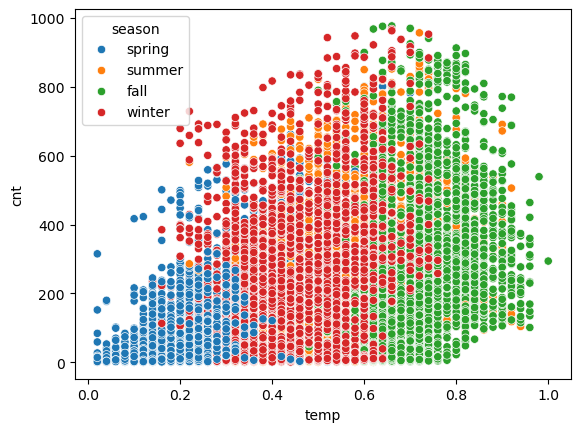

In [260]:
season = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
new_df = hour_df.copy()
new_df['season'] = hour_df['season'].map(season)

sns.scatterplot(data=new_df, x='temp', y='cnt', hue='season')



<Axes: xlabel='weathersit', ylabel='cnt'>

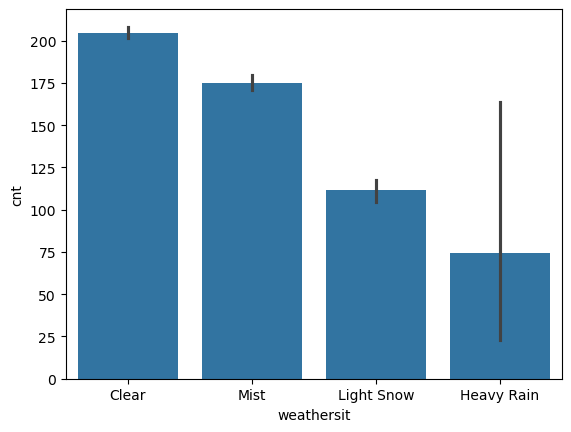

In [261]:
new_df['weathersit'] = hour_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
sns.barplot(data=new_df, x='weathersit', y='cnt')

<Axes: xlabel='season', ylabel='cnt'>

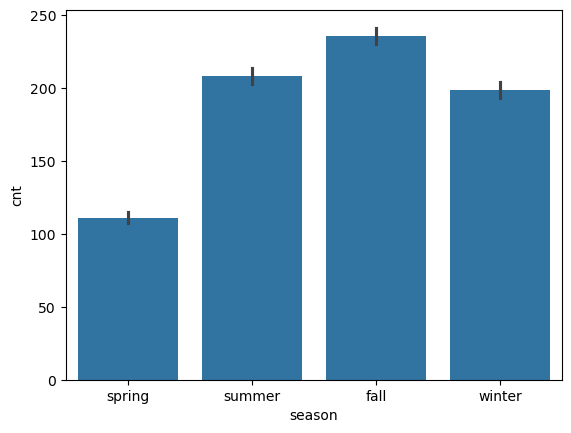

In [262]:
sns.barplot(data=new_df, x='season', y='cnt')

**Insight:**
- Musim yang paling banyak penyewa sepeda ada di musim summer dan fall, selain itu juga pada saat cuaca cerah sangat berpengaruh
- selain itu saat temp semakin hangan penyewa sepeda juga semakin banyak

### Pertanyaan 2: Bagaiman jumlah penyewaan sepeda pada setiap bulan di tahun 2011 dan 2012?

In [263]:
monthly_rent_df = new_df.resample("M", on='dteday').agg({'cnt':'sum'}).rename(columns={'cnt':'total'})
monthly_rent_df['month'] = monthly_rent_df.index.strftime('%B')
monthly_rent_df['year'] = monthly_rent_df.index.strftime('%Y')
monthly_rent_df = monthly_rent_df.reset_index()


/tmp/ipykernel_151213/3778563087.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rent_df = new_df.resample("M", on='dteday').agg({'cnt':'sum'}).rename(columns={'cnt':'total'})


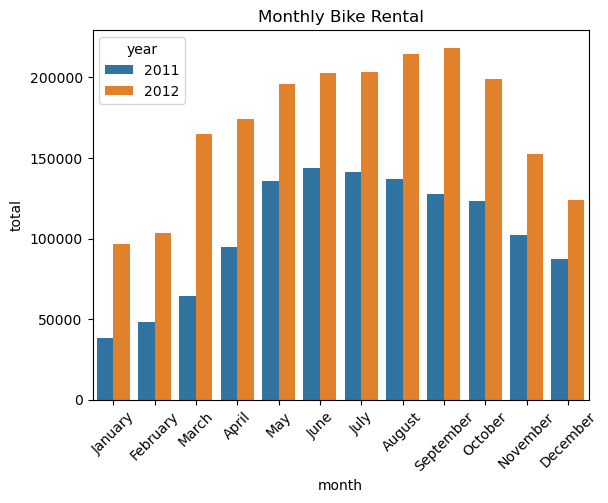

In [264]:
sns.barplot(data=monthly_rent_df, x='month', y='total', hue='year')
plt.xticks(rotation=45)
plt.title('Monthly Bike Rental')
plt.show()

**Insight:**
- Dapat dilihat jumlah penyewa sepeda naik di setiap bulan pada tahun 2011 dan tahun 2012

## Conclusion

- Dapat di simpulkan bahwa pengaruh lingkungan sangat besar pada jumlah penyewa sepeda setiap harinya
- Semakin hangat temp udaranya juga semakin banyak penyewa, begitu pula sebaliknya jika udara semakin dingin makan semakin berkurang pula total penyewa sepeda

In [265]:
new_df.to_csv("./data/all_data.csv", index=False)